In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/roshie/nalaiyathiran-datasets/main/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate analysis

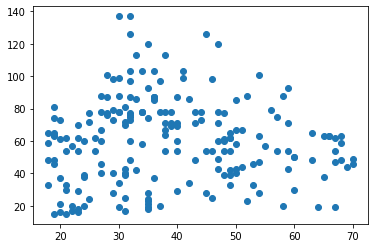

In [6]:
plt.scatter(df['Age'] ,df['Annual Income (k$)'])

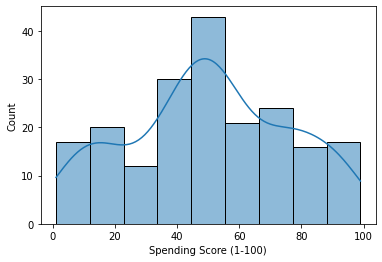

In [7]:
sns.histplot(df['Spending Score (1-100)'],kde=True)

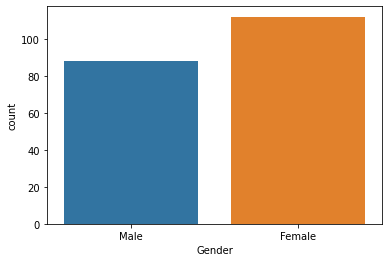

In [8]:
sns.countplot(x ='Gender', data = df)

## Bivariate analysis

In [9]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


(0.0, 100.0)

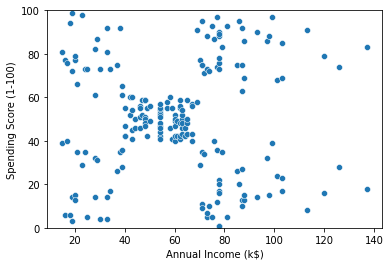

In [11]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.ylim(0,100)

In [15]:
df.pop("CustomerID")

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 200, dtype: int64

## Multivariate Analysis

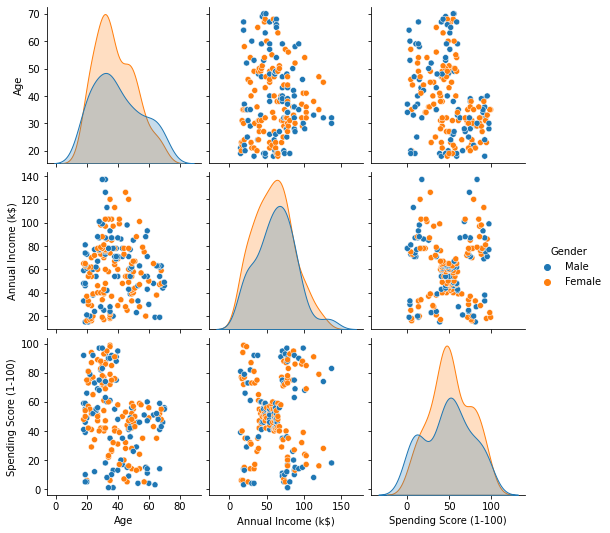

In [16]:
sns.pairplot(data=df,hue='Gender')

## Perform descriptive statistics on the dataset

In [17]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Handle the Missing values

### No Null values present in this dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## Find the outliers and replace the outliers

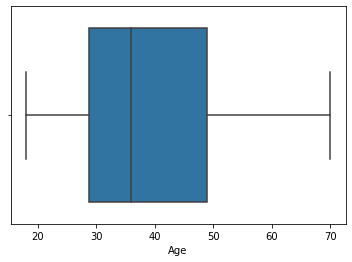

In [19]:
sns.boxplot(x=df['Age'])

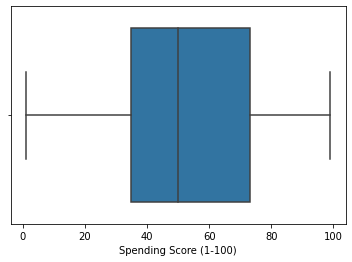

In [21]:
sns.boxplot(x=df['Spending Score (1-100)'])

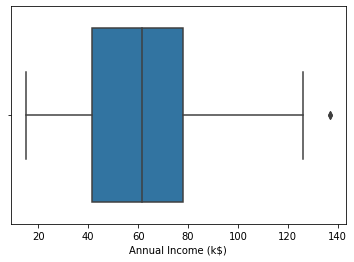

In [22]:
sns.boxplot(x=df['Annual Income (k$)'])

In [23]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR)

Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


In [31]:
df = df.loc[df['Annual Income (k$)'] < 120]

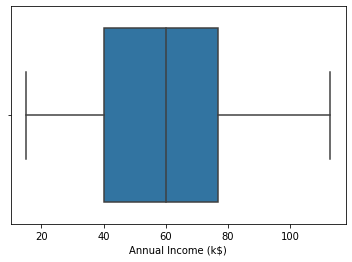

In [32]:
sns.boxplot(x=df['Annual Income (k$)'])

## Check for Categorical columns and perform encoding

In [33]:
df['Gender'].value_counts()

1    109
0     85
Name: Gender, dtype: int64

In [34]:
gen_n = {"Male":0,"Female":1}
df = df.replace(gen_n)

In [35]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## Split the data into dependent and independent variables

In [37]:
data_main =pd.get_dummies(df,columns=["Gender"])
data_main

,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,1
3,23,16,77,0,1
4,31,17,40,0,1
...,...,...,...,...,...
189,36,103,85,0,1
190,34,103,23,0,1
191,32,103,69,0,1
192,33,113,8,1,0


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Age"] = le.fit_transform(df["Age"])
df["Annual Income (k$)"] = le.fit_transform(df["Annual Income (k$)"])
df["Spending Score (1-100)"] = le.fit_transform(df["Spending Score (1-100)"])

In [40]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,0,29
1,0,3,0,66
2,1,2,1,4
3,1,5,1,63
4,1,13,2,30


In [48]:
from sklearn import cluster
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

In [49]:
error

[176921.61855670105,
 108519.36258710804,
 82302.64099641808,
 58382.8943691194,
 43737.62807430663,
 31420.31189242602,
 28634.90073769148,
 25704.506812485764,
 23235.267885645917,
 20996.357638974092]

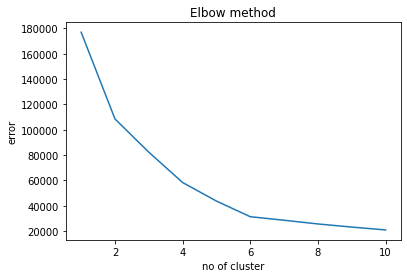

In [50]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of cluster')
plt.ylabel('error')
plt.show()

In [51]:
k_means_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [52]:
k_means_model.fit(df)

KMeans(n_clusters=3, random_state=0)

In [53]:
clustered_data =k_means_model.predict(df)

In [54]:
df['Clustered_data'] = pd.Series(clustered_data)
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Clustered_data
0,0,1,0,29,1
1,0,3,0,66,0
2,1,2,1,4,1
3,1,5,1,63,0
4,1,13,2,30,1


In [55]:
y=df['Clustered_data']
y

0      1
1      0
2      1
3      0
4      1
      ..
189    0
190    2
191    0
192    2
193    0
Name: Clustered_data, Length: 194, dtype: int32

In [56]:
X=df.drop(columns=['Clustered_data'],axis=1)
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,0,29
1,0,3,0,66
2,1,2,1,4
3,1,5,1,63
4,1,13,2,30


In [57]:
from sklearn.preprocessing import scale
data=pd.DataFrame(scale(X),columns=X.columns)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.132410,-1.434694,-1.898626,-0.539650
1,-1.132410,-1.289314,-1.898626,1.194284
2,0.883072,-1.362004,-1.837441,-1.711227
3,0.883072,-1.143933,-1.837441,1.053695
4,0.883072,-0.562412,-1.776256,-0.492787


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=1)
X_train.shape,X_test.shape

((135, 4), (59, 4))

In [60]:
y_train.shape,y_test.shape

((135,), (59,))

In [61]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train) 

KNeighborsClassifier()

In [62]:
pred_train = model.predict(X_train)
pred_train 

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2,
       1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1,
       1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0,
       2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0,
       1, 2, 0], dtype=int32)

In [63]:
y_test

44     1
172    2
163    0
35     0
136    2
11     0
123    0
82     1
175    0
102    1
174    2
180    2
29     0
16     1
143    0
166    2
28     1
51     0
31     0
122    0
47     1
4      1
98     1
56     1
78     0
58     0
132    2
124    2
53     1
127    0
67     1
120    0
59     1
97     0
187    0
14     1
40     1
19     0
110    1
112    1
114    0
167    0
69     1
152    2
33     0
89     1
154    2
188    2
105    0
107    1
42     1
17     0
5      0
117    1
182    2
48     1
39     0
116    1
66     1
Name: Clustered_data, dtype: int32

In [64]:
pred_test=model.predict(X_test)
pred_test 

array([1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2,
       0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1], dtype=int32)

In [65]:
pred = pd.DataFrame({'Actual_value':y_test,'Predicted_value_using_KNN':pred_test})
pred.head()

,Actual_value,Predicted_value_using_KNN
44,1,1
172,2,2
163,0,0
35,0,0
136,2,2


In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('Training accuracy: ',accuracy_score(y_train,pred_train))
print('Testing accuracy: ',accuracy_score(y_test,pred_test))

Training accuracy:  0.9703703703703703
Testing accuracy:  0.9661016949152542


In [67]:
pd.crosstab(y_test,pred_test)

col_0,0,1,2
Clustered_data,,,
0,24,0,0
1,2,22,0
2,0,0,11


In [68]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.92      0.96        24
           2       1.00      1.00      1.00        11

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

